<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/17_10_Evaluation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.10 Challenge

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header=None)
amazon.columns = ['review', 'score']

# Previous Classifier

In [0]:
#create positive keywords list and add to the dataframe

positive = ['great', 'good', 'love', 'like', 'nice', 'beautiful', 'happy', 'awesome', 'easy', 'helpful', 'useful', 'simple',
            'excellent', 'recommend', 'well', 'works', 'best', 'nice', 'must', 'price']


In [0]:
amazon['review'] = amazon['review'].str.lower()

In [0]:
#since part of the challenge is to create five different classifiers, create a separate df
amazon_1 = amazon
amazon_1.head()

,review,score
0,so there is no way for me to plug it in here i...,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more...,0
4,the mic is great.,1


In [0]:
#create our features

for p in positive:
    
    amazon_1[str(p)] = amazon_1.review.str.contains(
        str(p),
        case=False
    )

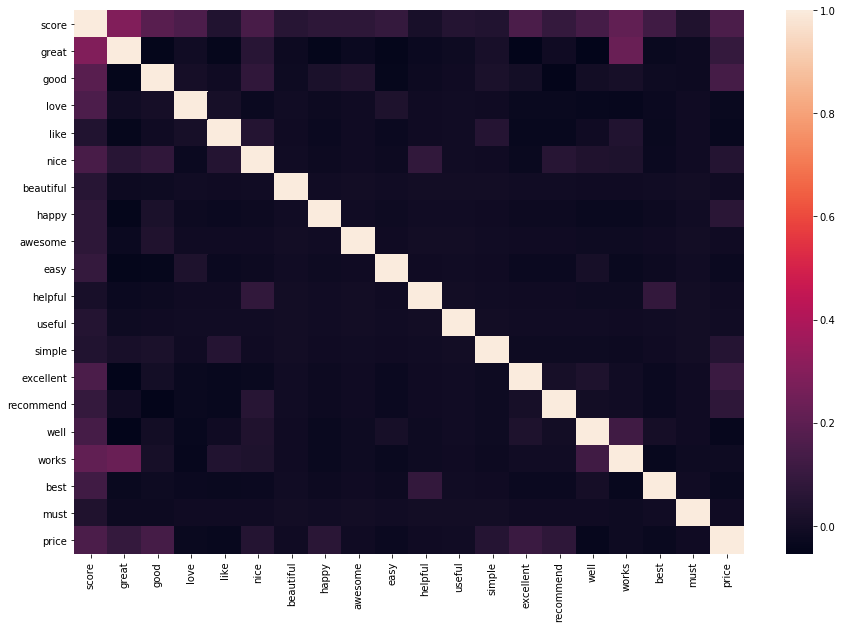

In [0]:
# create a heatmap to view correlation
plt.figure(figsize=(15,10))
sns.heatmap(amazon_1.corr())

In [0]:
data = amazon_1.iloc[:,2:]
target = amazon_1['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 224


In [0]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(target, y_pred)
print(cm1)

[[454  46]
 [178 322]]


In [0]:
print('{} false positives'
      .format(cm1[1,0]))
print('{} false negatives'
      .format(cm1[0,1]))
print()

sen = (cm1[1,1]/cm1[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} of total {} positives correctly identified'
      .format(cm1[1,1], cm1[1].sum() ))
print()

spe = (cm1[0,0]/cm1[0].sum()*100)
print('Specificity:', spe, '%')
print('{} of total {} negatives correctly identified'
      .format(cm1[0,0], cm1[0].sum() ))

178 false positives
46 false negatives

Sensitivity: 64.4 %
322 of total 500 positives correctly identified

Specificity: 90.8 %
454 of total 500 negatives correctly identified


In [0]:
#is the model overfitting?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.755
Testing on Sample: 0.776


In [0]:
from sklearn.model_selection import cross_val_score
cvs1 = cross_val_score(bnb, data, target, cv=10)
print(cvs1)
print(cvs1.std()*100)

[0.85 0.77 0.8  0.74 0.8  0.69 0.74 0.76 0.82 0.71]
4.749736834815168


# Create New Classifiers

# Amazon_2 - Negative Keywords

In [0]:
amazon_2 = amazon

In [0]:
#let's create a model that captures only negative reviews
negative = ['horrible', 'bad', 'worst', 'not', 'disappointed', 'sucks', 'terrible', 'awful', 'cheap', 'poor', 'junk', 'waste',
           'useless', 'beware', 'dying', 'fail']

In [0]:
for n in negative:
    
    amazon_2[str(n)] = amazon_2.review.str.contains(
        str(n),
        case=False
    )

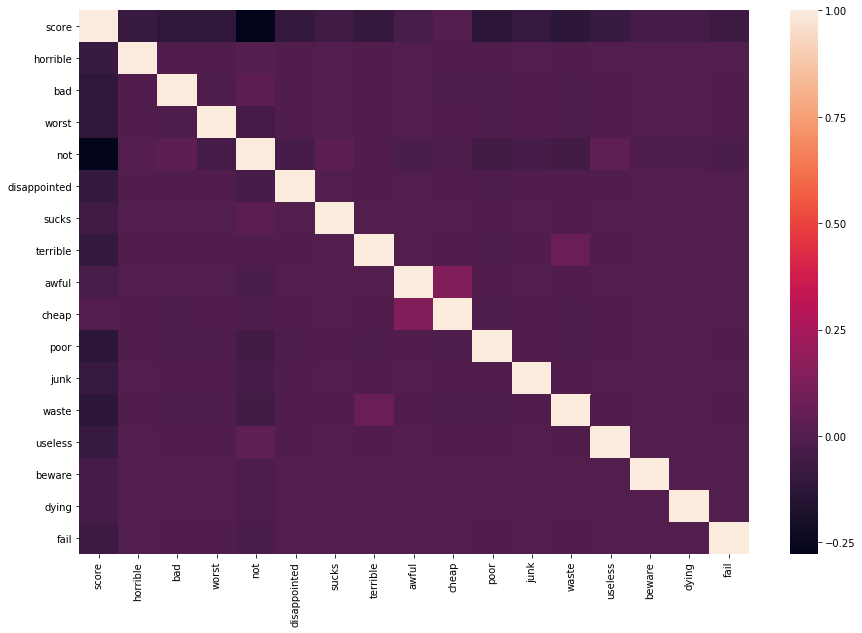

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(amazon_2.corr())

In [0]:
data = amazon_2.iloc[:,2:]
target = amazon_2['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 299


In [0]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(target, y_pred)
print(cm2)

[[220 280]
 [ 19 481]]


In [0]:
print('{} false positives'
      .format(cm2[1,0]))
print('{} false negatives'
      .format(cm2[0,1]))
print()

sen = (cm2[1,1]/cm2[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} of total {} positives correctly identified'
      .format(cm2[1,1], cm2[1].sum() ))
print()

spe = (cm2[0,0]/cm2[0].sum()*100)
print('Specificity:', spe, '%')
print('{} of total {} negatives correctly identified'
      .format(cm2[0,0], cm2[0].sum() ))

19 false positives
280 false negatives

Sensitivity: 96.2 %
481 of total 500 positives correctly identified

Specificity: 44.0 %
220 of total 500 negatives correctly identified


In [0]:
#is the model overfitting?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.715
Testing on Sample: 0.701


In [0]:
from sklearn.model_selection import cross_val_score
cvs2 = cross_val_score(bnb, data, target, cv=10)
print(cvs2)
print(cvs2.std()*100)

[0.68 0.73 0.73 0.72 0.74 0.66 0.67 0.64 0.72 0.69]
3.2802438933713427


# Amazon_3 - Combo of Amazon_1 and Amazon_2

In [0]:
amazon_3 = amazon

In [0]:
for p in positive:
    
    amazon_3[str(p)] = amazon_3.review.str.contains(
        str(p),
        case=False
    )
    
for n in negative:
    
    amazon_3[str(n)] = amazon_3.review.str.contains(
        str(n),
        case=False
    )

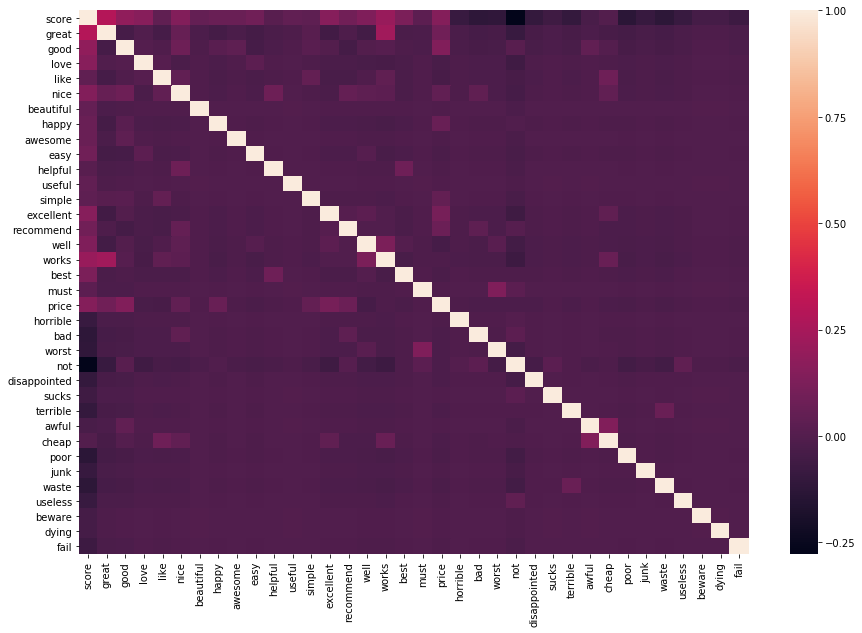

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(amazon_3.corr())

In [0]:
data = amazon_3.iloc[:,2:]
target = amazon_3['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 207


In [0]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(target, y_pred)
print(cm3)

[[460  40]
 [167 333]]


In [0]:
print('{} false positives'
      .format(cm3[1,0]))
print('{} false negatives'
      .format(cm3[0,1]))
print()

sen = (cm3[1,1]/cm3[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} of total {} positives correctly identified'
      .format(cm3[1,1], cm3[1].sum() ))
print()

spe = (cm3[0,0]/cm3[0].sum()*100)
print('Specificity:', spe, '%')
print('{} of total {} negatives correctly identified'
      .format(cm3[0,0], cm3[0].sum() ))

167 false positives
40 false negatives

Sensitivity: 66.60000000000001 %
333 of total 500 positives correctly identified

Specificity: 92.0 %
460 of total 500 negatives correctly identified


In [0]:
#is the model overfitting?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.75
Testing on Sample: 0.793


In [0]:
from sklearn.model_selection import cross_val_score
cvs3 = cross_val_score(bnb, data, target, cv=10)
print(cvs3)
print(cvs3.std()*100)

[0.87 0.77 0.79 0.78 0.85 0.72 0.76 0.76 0.81 0.75]
4.363484845854286


# Amazon_4 - Different Bayes Classifier

In [0]:
amazon_4 = amazon_3

In [0]:
data = amazon_4.iloc[:,2:]
target = amazon_4['score']

In [0]:

from sklearn.naive_bayes import ComplementNB

# Instantiate our model and store it in a new variable.
clf = ComplementNB()

# Fit our model to the data.
clf.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = clf.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 209


In [0]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(target, y_pred)
print(cm4)

[[473  27]
 [182 318]]


In [0]:
print('{} false positives'
      .format(cm4[1,0]))
print('{} false negatives'
      .format(cm4[0,1]))
print()

sen = (cm4[1,1]/cm4[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} of total {} positives correctly identified'
      .format(cm4[1,1], cm4[1].sum() ))
print()

spe = (cm4[0,0]/cm4[0].sum()*100)
print('Specificity:', spe, '%')
print('{} of total {} negatives correctly identified'
      .format(cm4[0,0], cm4[0].sum() ))

182 false positives
27 false negatives

Sensitivity: 63.6 %
318 of total 500 positives correctly identified

Specificity: 94.6 %
473 of total 500 negatives correctly identified


In [0]:
#is the model overfitting?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(clf.fit(data, target).score(data, target)))

With 20% Holdout: 0.745
Testing on Sample: 0.791


In [0]:
from sklearn.model_selection import cross_val_score
cvs4 = cross_val_score(clf, data, target, cv=10)
print(cvs4)
print(cvs4.std()*100)

[0.87 0.77 0.79 0.78 0.84 0.71 0.73 0.77 0.81 0.74]
4.678675026115835


# Amazon_5 - Additional Keywords

In [0]:
amazon_5 = amazon

In [0]:
#lets try adding more features in our keyword search

positive = ['great', 'good', 'love', 'like', 'nice', 'beautiful', 'happy', 'awesome', 'easy', 'helpful', 'useful', 'simple',
            'excellent', 'recommend', 'well', 'works', 'best', 'nice', 'must', 'price', 'glad', 'incredible', 'highly', 'pleased']

negative = ['horrible', 'bad', 'worst', 'not', 'disappointed', 'sucks', 'terrible', 'awful', 'cheap', 'poor', 'junk', 'waste',
           'useless', 'beware', 'dying', 'fail', 'problem', 'return', 'returned', 'do not', 'unhappy', 'slow', 'mistake']

In [0]:
for p in positive:
    
    amazon_5[str(p)] = amazon_5.review.str.contains(
        str(p),
        case=False
    )
    
for n in negative:
    
    amazon_5[str(n)] = amazon_5.review.str.contains(
        str(n),
        case=False
    )

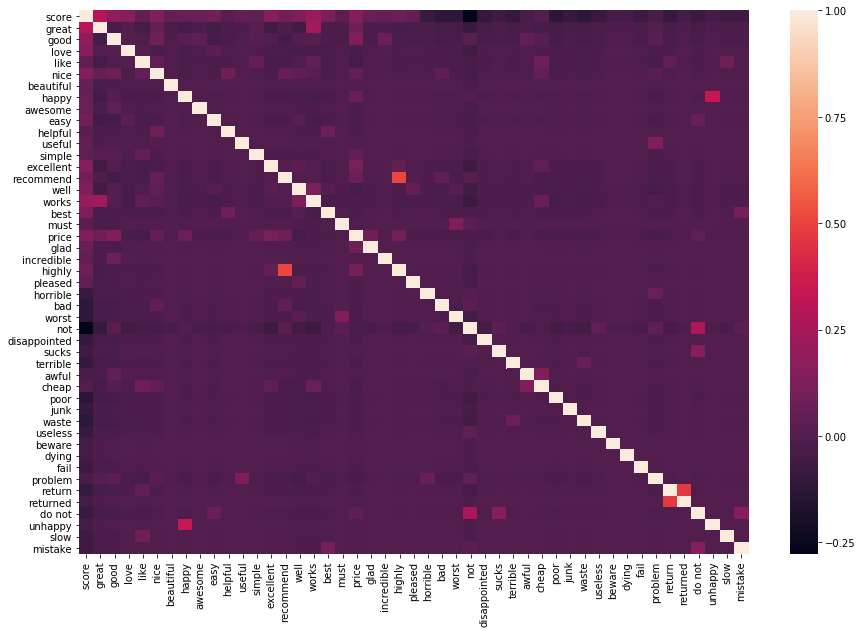

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(amazon_5.corr())

In [0]:
data = amazon_5.iloc[:,2:]
target = amazon_5['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 197


In [0]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(target, y_pred)
print(cm5)

[[462  38]
 [159 341]]


In [0]:
print('{} false positives'
      .format(cm5[1,0]))
print('{} false negatives'
      .format(cm5[0,1]))
print()

sen = (cm5[1,1]/cm5[1].sum()*100)
print('Sensitivity:', sen, '%')
print('{} of total {} positives correctly identified'
      .format(cm5[1,1], cm5[1].sum() ))
print()

spe = (cm5[0,0]/cm5[0].sum()*100)
print('Specificity:', spe, '%')
print('{} of total {} negatives correctly identified'
      .format(cm5[0,0], cm5[0].sum() ))

159 false positives
38 false negatives

Sensitivity: 68.2 %
341 of total 500 positives correctly identified

Specificity: 92.4 %
462 of total 500 negatives correctly identified


In [0]:
#is the model overfitting?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.755
Testing on Sample: 0.803


In [0]:
from sklearn.model_selection import cross_val_score
cvs5 = cross_val_score(bnb, data, target, cv=10)
print(cvs5)
print(cvs5.std()*100)

[0.87 0.81 0.8  0.77 0.86 0.71 0.77 0.76 0.82 0.76]
4.648655719667785


# Do any of your classifiers seem to overfit?

They don't seem to be as each model had a variance of 3.28% to 4.75% when evaluating using cross validation. 

# Which seem to perform the best? Why?

The best performing model seemed to be Amazon_5. It was a combined model of positive and negative features whilst adding some more keywords after taking a look through the data manually. 

# Which features seemed to be most impactful to performance?

Combining the positive and negative features of Amazon_1 and Amazon_2 seemed to have a big impact when creating Amazon_3. Amazon_5 improved upon Amazon_3 by adding some more keywords to our postive and negative lists. Amazon_4 was an experiment to see if a different Naive Bayes classifier could help us and it did have an impact on our specificity. 